<a href="https://colab.research.google.com/github/rizqyjoe/Facial_Expression_Recognition_CNN_VGG16/blob/main/Coba3/Model%203_Scratch/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from keras import layers
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:400: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [2]:
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
 
dataset_path = '/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013/fer2013.csv'
image_size=(48,48)

def load_fer2013():
    data = pd.read_csv(dataset_path)
    data = (data[data['pixels'].notnull()])
    pixels = data['pixels'].tolist()
    width, height = 48, 48
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height)
        face = cv2.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    faces = np.expand_dims(faces, -1)
    emotions = (data['emotion'])#.values
    return faces, emotions
 
def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x
 
faces, emotions = load_fer2013()
faces = preprocess_input(faces)
#xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.2,shuffle=True)
#Data Augumentation
'''data_generator = ImageDataGenerator(rotation_range=10,
                                    shear_range = 10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    horizontal_flip=True)'''

data_generator = ImageDataGenerator()

In [3]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely # the _junk suffix means that we drop that variable completely
#x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

xtrain, xtest, ytrain, ytest = train_test_split(faces, emotions, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
x_val, xtest, y_val, ytest = train_test_split(xtest, ytest, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [4]:
print ("validasi",x_val.shape)
print (y_val.shape)
print ("test",xtest.shape)
print (ytest.shape)
print ("train",xtrain.shape)
print (ytrain.shape)

validasi (3589, 48, 48, 1)
(3589,)
test (3589, 48, 48, 1)
(3589,)
train (28709, 48, 48, 1)
(28709,)


Model

In [5]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation

input_shape = (48, 48, 1)
num_classes = 7

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
'''model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=num_class, activation="softmax"))

model.add(Dropout(0.5))
model.add(BatchNormalization())

In [ ]:
'''model = Sequential()

model.add(VGG16(
    include_top = False,
    pooling='avg',
    weights='imagenet',
))

In [ ]:
'''model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax', name = 'classifer'))'''

In [ ]:
'''model.layers[0].layers

In [ ]:
'''model.layers[0].trainable = False

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

In [7]:
from keras.optimizers import Adam,RMSprop,SGD

In [8]:
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
batch_size = 64
num_epochs = 30

history = model.fit(data_generator.flow(xtrain, ytrain),
                    steps_per_epoch=len(xtrain) / batch_size,
                    epochs=num_epochs, 
                    verbose=1,
                    validation_data= (x_val,y_val))

Epoch 1/30
448/448 [==============================] - 43s 47ms/step - loss: 2.2299 - accuracy: 0.2001 - val_loss: 1.8298 - val_accuracy: 0.2644
Epoch 2/30
448/448 [==============================] - 20s 44ms/step - loss: 1.8289 - accuracy: 0.2598 - val_loss: 1.7260 - val_accuracy: 0.3179
Epoch 3/30
448/448 [==============================] - 20s 44ms/step - loss: 1.7317 - accuracy: 0.3030 - val_loss: 1.7539 - val_accuracy: 0.2811
Epoch 4/30
448/448 [==============================] - 20s 44ms/step - loss: 1.6392 - accuracy: 0.3507 - val_loss: 1.5332 - val_accuracy: 0.3959
Epoch 5/30
448/448 [==============================] - 20s 44ms/step - loss: 1.5331 - accuracy: 0.3982 - val_loss: 1.4197 - val_accuracy: 0.4430
Epoch 6/30
448/448 [==============================] - 21s 47ms/step - loss: 1.4355 - accuracy: 0.4432 - val_loss: 1.3654 - val_accuracy: 0.4522
Epoch 7/30
448/448 [==============================] - 20s 44ms/step - loss: 1.3651 - accuracy: 0.4756 - val_loss: 1.2828 - val_accuracy:

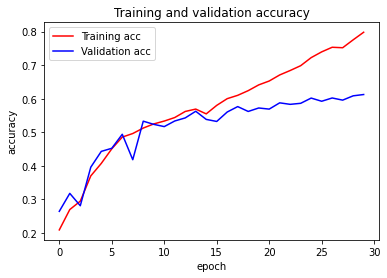

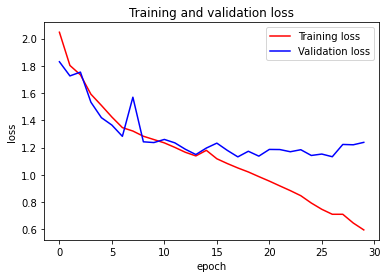

In [10]:
import matplotlib.pyplot as plt 

model.save('/content/drive/MyDrive/Colab Notebooks/Model/Model1_Fix_VGG16.h5')

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [11]:
testloss = model.evaluate(xtest, ytest) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

trainloss = model.evaluate(xtrain, ytrain) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))

113/113 [==============================] - 1s 13ms/step - loss: 1.2915 - accuracy: 0.5954
Test Loss 1.291452169418335
Test Acc: 0.5954304933547974
898/898 [==============================] - 11s 12ms/step - loss: 0.5616 - accuracy: 0.8142
Train Loss 0.5616294145584106
Train Acc: 0.8141697645187378


In [12]:
testlosz = model.evaluate(x_val, y_val) 
print("val Loss " + str(testlosz[0]))
print("val Acc: " + str(testlosz[1]))

113/113 [==============================] - 1s 12ms/step - loss: 1.2387 - accuracy: 0.6124
val Loss 1.2387467622756958
val Acc: 0.6124268770217896


In [13]:
from keras.models import load_model
model_load = load_model('/content/drive/MyDrive/Colab Notebooks/Model/Model1_Fix_VGG16.h5')

model_load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

In [14]:
testloss = model_load.evaluate(xtest, ytest) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

testloss = model_load.evaluate(xtrain, ytrain) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

113/113 [==============================] - 2s 13ms/step - loss: 1.2915 - accuracy: 0.5954
Test Loss 1.291452169418335
Test Acc: 0.5954304933547974
898/898 [==============================] - 12s 13ms/step - loss: 0.5616 - accuracy: 0.8142
Test Loss 0.5616294145584106
Test Acc: 0.8141697645187378


In [15]:
testlosz = model_load.evaluate(x_val, y_val) 
print("Test Loss " + str(testlosz[0]))
print("Test Acc: " + str(testlosz[1]))

113/113 [==============================] - 1s 12ms/step - loss: 1.2387 - accuracy: 0.6124
Test Loss 1.2387467622756958
Test Acc: 0.6124268770217896


In [16]:
print (x_val.shape)
print (y_val.shape)
print (xtest.shape)
print (ytest.shape)
print (xtrain.shape)
print (ytrain.shape)

(3589, 48, 48, 1)
(3589,)
(3589, 48, 48, 1)
(3589,)
(28709, 48, 48, 1)
(28709,)


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

#y_pred = model_load.predict(xtest)

test_prob = model_load.predict(xtest)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == ytest)

print(test_accuracy)

0.5954304820284202


In [18]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

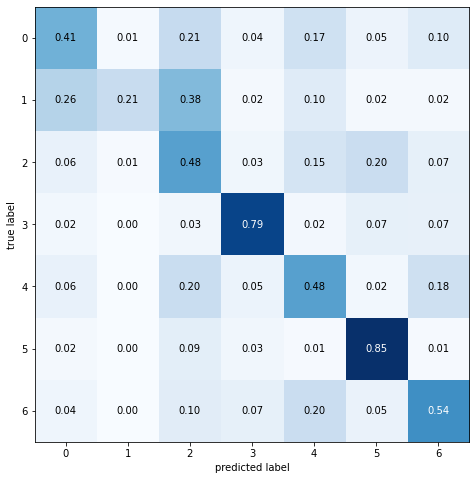

In [19]:
conf_mat = confusion_matrix(ytest, test_pred)

pd.DataFrame(conf_mat, columns=emotions.values(), index=emotions.values())



fig, ax = plot_confusion_matrix(conf_mat=conf_mat,show_normed=True,show_absolute=False,figsize=(8, 8))
fig.show()